# <p style="background-color:#5352ed;font-family:newtimeroman;color:#EFF0F7;font-size:150%;text-align:center;border-radius:10px 10px;">Import Libraries</p>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import nltk
import re

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D,MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/.config/default_configs.db
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/logs/2024.04.12/13.21.52.525646.log
/content/.config/logs/2024.04.12/13.20.53.908899.log
/content/.config/logs/2024.04.12/13.21.53.197874.log
/content/.config/logs/2024.04.12/13.21.21.247024.log
/content/.config/logs/2024.04.12/13.21.41.685008.log
/content/.config/logs/2024.04.12/13.21.32.355355.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


# **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_true = pd.read_excel("/content/drive/MyDrive/dataset/dataset_cnn_10k_cleaned.xlsx")
df_true = pd.read_excel("/content/drive/MyDrive/dataset/dataset_kompas_4k_cleaned.xlsx")
df_true = pd.read_excel("/content/drive/MyDrive/dataset/dataset_tempo_6k_cleaned.xlsx")
df_fake = pd.read_excel("/content/drive/MyDrive/dataset/dataset_turnbackhoax_10_cleaned.xlsx")

In [ ]:
df_true

Unnamed: 0                                              Title  \
0              0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...   
1              1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...   
2              2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...   
3              3  Top Nasional: Strategi Hadapi Omicron, Lemhana...   
4              4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...   
...          ...                                                ...   
6587        6587  5 Fakta dan Kasak-kusuk Jabatan Gubernur Diusu...   
6588        6588  Komentari soal PDIP Enggan Berkoalisi dengan P...   
6589        6589  Top Nasional: NasDem Bilang Piagam Deklarasi K...   
6590        6590  NasDem Sebut Demokrat Tak Ngotot Sodorkan AHY ...   
6591        6591  Nasdem Soal Rencana Kunjungi PDIP: Kami Tak Me...   

                             Timestamp  \
0      Sabtu, 1 Januari 2022 17:14 WIB   
1      Sabtu, 1 Januari 2022 15:05 WIB   
2      Sabtu, 1 Januari 2022 12:05 WIB   
3      Sabtu, 1 Januari 2022 07:28 WIB   
4      Sabtu, 1 Januari 2022 07:02 WIB   
...                                ...   
6587  Sabtu, 4 Februari 2023 10:10 WIB   
6588  Sabtu, 4 Februari 2023 08:36 WIB   
6589  Sabtu, 4 Februari 2023 07:54 WIB   
6590  Sabtu, 4 Februari 2023 06:50 WIB   
6591  Sabtu, 4 Februari 2023 06:21 WIB   

                                               FullText  \
0     TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...   
1     TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...   
2     TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...   
3     TEMPO.CO, Jakarta - Berita yang banyak menarik...   
4     TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...   
...                                                 ...   
6587  TEMPO.CO, Jakarta -Wakil Ketua DPR RI Muhaimin...   
6588  TEMPO.CO, Jakarta - Ketua DPP Partai NasDem Wi...   
6589  TEMPO.CO, Jakarta - Berita yang menarik perhat...   
6590  TEMPO.CO, Jakarta - Ketua DPP Partai NasDem Su...   
6591  TEMPO.CO, Jakarta - Ketua DPP Partai NasDem Su...   

                                                   Tags  \
0     Ma'ruf Amin;Piala AFF 2020;Indonesia vs Thaila...   
1     Menag;Yaqut Cholil Qoumas;Gus Yaqut;Toleransi;...   
2                   Jokowi;2022;Pandemi Covid-19;Resesi   
3            Omicron;Lemhanas;Kemenkes;WHO;Agus Widjojo   
4     Tjahjo Kumolo;Menpan RB;ASN;PNS;protokol keseh...   
...                                                 ...   
6587  Gubernur;Gubernur Jawa Barat;Ridwan Kamil;Sult...   
6588        PDIP;NasDem;Impor;Hasto;Syahrul Yasin Limpo   
6589     Koalisi Perubahan;NasDem;PKS;Surya Paloh;Luhut   
6590             AHY;Anies;Demokrat;NasDem;Pilpres 2024   
6591  NasDem;PDIP;Megawati;Hasto Kristiyanto;Surya P...   

                                                 Author  \
0           Reporter Egi Adyatama Editor Aditya Budiman   
1           Reporter Egi Adyatama Editor Aditya Budiman   
2                 Reporter Antara Editor Eko Ari Wibowo   
3               Reporter Tempo.co Editor Eko Ari Wibowo   
4       Reporter Friski Riana Editor Syailendra Persada   
...                                                 ...   
6587  Reporter Hendrik Khoirul Muhid Editor Dwi Arjanto   
6588    Reporter Ima Dini Shafira Editor Eko Ari Wibowo   
6589            Reporter Tempo.co Editor Eko Ari Wibowo   
6590    Reporter Ima Dini Shafira Editor Eko Ari Wibowo   
6591    Reporter Ima Dini Shafira Editor Eko Ari Wibowo   

                                                    Url  \
0     https://nasional.tempo.co/read/1545504/maruf-a...   
1     https://nasional.tempo.co/read/1545477/menag-y...   
2     https://nasional.tempo.co/read/1545437/jokowi-...   
3     https://nasional.tempo.co/read/1545377/top-nas...   
4     https://nasional.tempo.co/read/1545310/mulai-t...   
...                                                 ...   
6587  https://nasional.tempo.co/read/1687515/5-fakta...   
6588  https://nasional.tempo.co/read/1687528/kome

In [ ]:
df_fake

Unnamed: 0                                              Title  \
0               0  [SALAH] Anies Baswedan Dekat Dengan Aliran Krs...   
1               1  [SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...   
2               2      [SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT   
3               3  [SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...   
4               4  [SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...   
...           ...                                                ...   
10376       10379  (HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...   
10377       10380  (HOAX) Jokowi dituduh bodoh, salah cara dalam ...   
10378       10381  (FITNAH) Jokowi dituduh memasukkan ribuan tena...   
10379       10382                   (HOAX) Mata Uang Rupiah Terpuruk   
10380       10383  (FITNAH) Ahok izinkan Natalan di Monas – tapi ...   

                 Timestamp                                           FullText  \
0            Maret 1, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
1            Maret 1, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
2        Februari 28, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
3        Februari 28, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
4        Februari 28, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
...                    ...                                                ...   
10376  2015-09-15 00:00:00  Sumber : media sosial\nNarasi : Raja Salman da...   
10377  2015-09-12 00:00:00  Sumber : media sosial\nNarasi : hehe, selalu b...   
10378  2015-09-08 00:00:00  Sumber : Media Sosial\nNarasi : Pak Jokowi itu...   
10379  2015-09-08 00:00:00  Sumber : media sosial\nNarasi : Hari ini, Rabu...   
10380        Juli 31, 2015  SUMBER : Media Sosial\nNARASI : MARI KITA TOLA...   

                    Tags                  Author  \
0      Fitnah;Hasut;Hoax  Pemeriksa Fakta Junior   
1      Fitnah;Hasut;Hoax  Pemeriksa Fakta Junior   
2      Fitnah;Hasut;Hoax  Pemeriksa Fakta Junior   
3      Fitnah;Hasut;Hoax  Pemeriksa Fakta Junior   
4      Fitnah;Hasut;Hoax  Pemeriksa Fakta Junior   
...                  ...                     ...   
10376  Fitnah;Hasut;Hoax       Bentang Febrylian   
10377  Fitnah;Hasut;Hoax       Bentang Febrylian   
10378  Fitnah;Hasut;Hoax       Bentang Febrylian   
10379  Fitnah;Hasut;Hoax       Bentang Febrylian   
10380  Fitnah;Hasut;Hoax       Bentang Febrylian   

                                                     Url  politik  \
0      https://turnbackhoax.id/2023/03/01/salah-anies...        1   
1      https://turnbackhoax.id/2023/03/01/salah-hakim...        0   
2      https://turnbackhoax.id/2023/02/28/salah-gamba...        1   
3      https://turnbackhoax.id/2023/02/28/salah-jonat...        0   
4      https://turnbackhoax.id/2023/02/28/salah-pesan...        1   
...                                                  ...      ...   
10376  https://turnbackhoax.id/2015/09/15/hoax-foto-r...        0   
10377  https://turnbackhoax.id/2015/09/12/jokowi-ditu...        1   
10378  https://turnbackhoax.id/2015/09/08/jokowi-ditu...        1   
10379  https://turnbackhoax.id/2015/09/08/mata-uang-r...        0   
10380  https://turnbackhoax.id/2015/07/31/fitnah-ahok...        1   

                                                  Narasi  \
0      \n“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU...   
1      \n“ini bener gasih?? Ya Allah gimna keadaan pa...   
2      \n“Nenek lampir pemimpin partai banteng bercul...   
3      \n“gerombolan kulup banyak menyusup ke ormas2 ...   
4                                                          
...                                                  ...   
10376   Raja Salman dari arab saudi membawa orang-ora...   
10377   hehe, selalu bisa tersenyum melihat tingkah l...   
10378   Pak Jokowi itu menjadi walikota periode perta...   
10379   Hari ini, Rabu (23/09/2015), nilai tukar rupi...   
10380   MARI KITA TOLAK. 25 desember acara pastur di ..

In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6592 entries, 0 to 6591
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6592 non-null   int64 
 1   Title       6592 non-null   object
 2   Timestamp   6592 non-null   object
 3   FullText    6592 non-null   object
 4   Tags        6591 non-null   object
 5   Author      6592 non-null   object
 6   Url         6592 non-null   object
 7   text_new    6592 non-null   object
 8   hoax        6592 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 463.6+ KB


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10381 entries, 0 to 10380
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10381 non-null  int64 
 1   Title         10381 non-null  object
 2   Timestamp     10381 non-null  object
 3   FullText      10381 non-null  object
 4   Tags          10381 non-null  object
 5   Author        10381 non-null  object
 6   Url           10381 non-null  object
 7   politik       10381 non-null  int64 
 8   Narasi        10381 non-null  object
 9   Clean Narasi  6502 non-null   object
 10  hoax          10381 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 892.2+ KB


# **Pelabelan**

In [ ]:
df_true['is_fake'] = 1

In [ ]:
df_fake['is_fake'] = 0

In [ ]:
#Reset Index to avoid overlapping after concat
df = pd.concat([df_true, df_fake]).reset_index(drop=True)
df

Unnamed: 0                                              Title  \
0               0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...   
1               1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...   
2               2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...   
3               3  Top Nasional: Strategi Hadapi Omicron, Lemhana...   
4               4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...   
...           ...                                                ...   
16968       10379  (HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...   
16969       10380  (HOAX) Jokowi dituduh bodoh, salah cara dalam ...   
16970       10381  (FITNAH) Jokowi dituduh memasukkan ribuan tena...   
16971       10382                   (HOAX) Mata Uang Rupiah Terpuruk   
16972       10383  (FITNAH) Ahok izinkan Natalan di Monas – tapi ...   

                             Timestamp  \
0      Sabtu, 1 Januari 2022 17:14 WIB   
1      Sabtu, 1 Januari 2022 15:05 WIB   
2      Sabtu, 1 Januari 2022 12:05 WIB   
3      Sabtu, 1 Januari 2022 07:28 WIB   
4      Sabtu, 1 Januari 2022 07:02 WIB   
...                                ...   
16968              2015-09-15 00:00:00   
16969              2015-09-12 00:00:00   
16970              2015-09-08 00:00:00   
16971              2015-09-08 00:00:00   
16972                    Juli 31, 2015   

                                                FullText  \
0      TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...   
1      TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...   
2      TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...   
3      TEMPO.CO, Jakarta - Berita yang banyak menarik...   
4      TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...   
...                                                  ...   
16968  Sumber : media sosial\nNarasi : Raja Salman da...   
16969  Sumber : media sosial\nNarasi : hehe, selalu b...   
16970  Sumber : Media Sosial\nNarasi : Pak Jokowi itu...   
16971  Sumber : media sosial\nNarasi : Hari ini, Rabu...   
16972  SUMBER : Media Sosial\nNARASI : MARI KITA TOLA...   

                                                    Tags  \
0      Ma'ruf Amin;Piala AFF 2020;Indonesia vs Thaila...   
1      Menag;Yaqut Cholil Qoumas;Gus Yaqut;Toleransi;...   
2                    Jokowi;2022;Pandemi Covid-19;Resesi   
3             Omicron;Lemhanas;Kemenkes;WHO;Agus Widjojo   
4      Tjahjo Kumolo;Menpan RB;ASN;PNS;protokol keseh...   
...                                                  ...   
16968                                  Fitnah;Hasut;Hoax   
16969                                  Fitnah;Hasut;Hoax   
16970                                  Fitnah;Hasut;Hoax   
16971                                  Fitnah;Hasut;Hoax   
16972                                  Fitnah;Hasut;Hoax   

                                                Author  \
0          Reporter Egi Adyatama Editor Aditya Budiman   
1          Reporter Egi Adyatama Editor Aditya Budiman   
2                Reporter Antara Editor Eko Ari Wibowo   
3              Reporter Tempo.co Editor Eko Ari Wibowo   
4      Reporter Friski Riana Editor Syailendra Persada   
...                                                ...   
16968                                Bentang Febrylian   
16969                                Bentang Febrylian   
16970                                Bentang Febrylian   
16971                                Bentang Febrylian   
16972                                Bentang Febrylian   

                                                     Url  \
0      https://nasional.tempo.co/read/1545504/maruf-a...   
1      https://nasional.tempo.co/read/1545477/menag-y...   
2      https://nasional.tempo.co/read/1545437/jokowi-...   
3      https://nasional.tempo.co/read/1545377/top-nas...   
4      https://nasional.tempo.co/read/1545310/mulai-t...   
...                                                  ...   
16968  https://turnbackhoax.id/2015/09/15/hoax-foto-r...   
16969  https://tur

In [ ]:
#to drop the column
df.drop(columns = ['Timestamp'], inplace = True)
df.drop(columns = ['Author'], inplace = True)

In [ ]:
df

Unnamed: 0                                              Title  \
0               0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...   
1               1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...   
2               2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...   
3               3  Top Nasional: Strategi Hadapi Omicron, Lemhana...   
4               4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...   
...           ...                                                ...   
16968       10379  (HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...   
16969       10380  (HOAX) Jokowi dituduh bodoh, salah cara dalam ...   
16970       10381  (FITNAH) Jokowi dituduh memasukkan ribuan tena...   
16971       10382                   (HOAX) Mata Uang Rupiah Terpuruk   
16972       10383  (FITNAH) Ahok izinkan Natalan di Monas – tapi ...   

                                                FullText  \
0      TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...   
1      TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...   
2      TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...   
3      TEMPO.CO, Jakarta - Berita yang banyak menarik...   
4      TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...   
...                                                  ...   
16968  Sumber : media sosial\nNarasi : Raja Salman da...   
16969  Sumber : media sosial\nNarasi : hehe, selalu b...   
16970  Sumber : Media Sosial\nNarasi : Pak Jokowi itu...   
16971  Sumber : media sosial\nNarasi : Hari ini, Rabu...   
16972  SUMBER : Media Sosial\nNARASI : MARI KITA TOLA...   

                                                    Tags  \
0      Ma'ruf Amin;Piala AFF 2020;Indonesia vs Thaila...   
1      Menag;Yaqut Cholil Qoumas;Gus Yaqut;Toleransi;...   
2                    Jokowi;2022;Pandemi Covid-19;Resesi   
3             Omicron;Lemhanas;Kemenkes;WHO;Agus Widjojo   
4      Tjahjo Kumolo;Menpan RB;ASN;PNS;protokol keseh...   
...                                                  ...   
16968                                  Fitnah;Hasut;Hoax   
16969                                  Fitnah;Hasut;Hoax   
16970                                  Fitnah;Hasut;Hoax   
16971                                  Fitnah;Hasut;Hoax   
16972                                  Fitnah;Hasut;Hoax   

                                                     Url  \
0      https://nasional.tempo.co/read/1545504/maruf-a...   
1      https://nasional.tempo.co/read/1545477/menag-y...   
2      https://nasional.tempo.co/read/1545437/jokowi-...   
3      https://nasional.tempo.co/read/1545377/top-nas...   
4      https://nasional.tempo.co/read/1545310/mulai-t...   
...                                                  ...   
16968  https://turnbackhoax.id/2015/09/15/hoax-foto-r...   
16969  https://turnbackhoax.id/2015/09/12/jokowi-ditu...   
16970  https://turnbackhoax.id/2015/09/08/jokowi-ditu...   
16971  https://turnbackhoax.id/2015/09/08/mata-uang-r...   
16972  https://turnbackhoax.id/2015/07/31/fitnah-ahok...   

                                                text_new  hoax  is_fake  \
0      Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...     0        1   
1      Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...     0        1   
2      Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...     0        1   
3      Top Nasional: Strategi Hadapi Omicron, Lemhana...     0        1   
4      Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...     0        1   
...                                                  ...   ...      ...   
16968                                                NaN     1        0   
16969                                                NaN     1        0   
16970                                                NaN     1        0   
16971                                                NaN     1        0   
16972                                                NaN     1        0   

       politik                                             Narasi  \
0        

In [ ]:
df['is_fake'].value_counts()

is_fake
0    10381
1     6592
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Unnamed: 0          0
Title               0
FullText            0
Tags                1
Url                 0
text_new        10381
hoax                0
is_fake             0
politik          6592
Narasi           6592
Clean Narasi    10471
dtype: int64

In [ ]:
df.isnull()

Unnamed: 0  Title  FullText   Tags    Url  text_new   hoax  is_fake  \
0           False  False     False  False  False     False  False    False   
1           False  False     False  False  False     False  False    False   
2           False  False     False  False  False     False  False    False   
3           False  False     False  False  False     False  False    False   
4           False  False     False  False  False     False  False    False   
...           ...    ...       ...    ...    ...       ...    ...      ...   
16968       False  False     False  False  False      True  False    False   
16969       False  False     False  False  False      True  False    False   
16970       False  False     False  False  False      True  False    False   
16971       False  False     False  False  False      True  False    False   
16972       False  False     False  False  False      True  False    False   

       politik  Narasi  Clean Narasi  
0         True    True          True  
1         True    True          True  
2         True    True          True  
3         True    True          True  
4         True    True          True  
...        ...     ...           ...  
16968    False   False         False  
16969    False   False         False  
16970    False   False         False  
16971    False   False         False  
16972    False   False         False  

[16973 rows x 11 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'Title', 'FullText', 'Tags', 'Url', 'text_new', 'hoax',
       'is_fake', 'politik', 'Narasi', 'Clean Narasi'],
      dtype='object')

In [ ]:
df['Description']=df['Title'] + " " + df['FullText']
df

Unnamed: 0                                              Title  \
0               0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...   
1               1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...   
2               2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...   
3               3  Top Nasional: Strategi Hadapi Omicron, Lemhana...   
4               4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...   
...           ...                                                ...   
16968       10379  (HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...   
16969       10380  (HOAX) Jokowi dituduh bodoh, salah cara dalam ...   
16970       10381  (FITNAH) Jokowi dituduh memasukkan ribuan tena...   
16971       10382                   (HOAX) Mata Uang Rupiah Terpuruk   
16972       10383  (FITNAH) Ahok izinkan Natalan di Monas – tapi ...   

                                                FullText  \
0      TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...   
1      TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...   
2      TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...   
3      TEMPO.CO, Jakarta - Berita yang banyak menarik...   
4      TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...   
...                                                  ...   
16968  Sumber : media sosial\nNarasi : Raja Salman da...   
16969  Sumber : media sosial\nNarasi : hehe, selalu b...   
16970  Sumber : Media Sosial\nNarasi : Pak Jokowi itu...   
16971  Sumber : media sosial\nNarasi : Hari ini, Rabu...   
16972  SUMBER : Media Sosial\nNARASI : MARI KITA TOLA...   

                                                    Tags  \
0      Ma'ruf Amin;Piala AFF 2020;Indonesia vs Thaila...   
1      Menag;Yaqut Cholil Qoumas;Gus Yaqut;Toleransi;...   
2                    Jokowi;2022;Pandemi Covid-19;Resesi   
3             Omicron;Lemhanas;Kemenkes;WHO;Agus Widjojo   
4      Tjahjo Kumolo;Menpan RB;ASN;PNS;protokol keseh...   
...                                                  ...   
16968                                  Fitnah;Hasut;Hoax   
16969                                  Fitnah;Hasut;Hoax   
16970                                  Fitnah;Hasut;Hoax   
16971                                  Fitnah;Hasut;Hoax   
16972                                  Fitnah;Hasut;Hoax   

                                                     Url  \
0      https://nasional.tempo.co/read/1545504/maruf-a...   
1      https://nasional.tempo.co/read/1545477/menag-y...   
2      https://nasional.tempo.co/read/1545437/jokowi-...   
3      https://nasional.tempo.co/read/1545377/top-nas...   
4      https://nasional.tempo.co/read/1545310/mulai-t...   
...                                                  ...   
16968  https://turnbackhoax.id/2015/09/15/hoax-foto-r...   
16969  https://turnbackhoax.id/2015/09/12/jokowi-ditu...   
16970  https://turnbackhoax.id/2015/09/08/jokowi-ditu...   
16971  https://turnbackhoax.id/2015/09/08/mata-uang-r...   
16972  https://turnbackhoax.id/2015/07/31/fitnah-ahok...   

                                                text_new  hoax  is_fake  \
0      Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...     0        1   
1      Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...     0        1   
2      Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...     0        1   
3      Top Nasional: Strategi Hadapi Omicron, Lemhana...     0        1   
4      Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...     0        1   
...                                                  ...   ...      ...   
16968                                                NaN     1        0   
16969                                                NaN     1        0   
16970                                                NaN     1        0   
16971                                                NaN     1        0   
16972                                                NaN     1        0   

       politik                                             Narasi  \
0        

In [ ]:
df['Description'][0]

'Ma\'ruf Amin akan Saksikan Lagi Timnas Indonesia Vs Thailand di Final AFF 2020 TEMPO.CO, Jakarta - Wakil Presiden Ma\'ruf Amin dijadwalkan menyaksikan laga final Piala AFF 2020 leg kedua antara Timnas Indonesia melawan Thailand Sabtu, 1 Desember 2021. Ma\'ruf diketahui sudah menonton bareng laga Timnas sejak semifinal lalu."Pada Sabtu malam Bapak Wapres kembali akan menonton laga final Timnas, mudah-mudahan nantinya Timnas sepak bola kita bisa memperoleh kemenangan," ujar pelaksana tugas Kepala Sekretariat Wapres Ahmad Erani Yustika dalam keterangannya, Jum\'at, 31 Desember 2021.Sebelum laga final putaran pertama Indonesia Vs Thailand kemarin, Ma\'ruf mengatakan ada dua hal yang harus dibenahi tim asuhan pelatih Shin Tae-yong tersebut."Satu itu staminanya harus diperkuat. Ini memang kalau bermain full 90 menit jangan sampai ada perubahan, itu yang harus terus didorong. Kedua, kecepatan, lari," kata Ma\'ruf saat ditanyai wartawan, Kamis, 29 Desember 2021.Jika kedua hal tersebut bisa di

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16973 entries, 0 to 16972
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16973 non-null  int64  
 1   Title         16973 non-null  object 
 2   FullText      16973 non-null  object 
 3   Tags          16972 non-null  object 
 4   Url           16973 non-null  object 
 5   text_new      6592 non-null   object 
 6   hoax          16973 non-null  int64  
 7   is_fake       16973 non-null  int64  
 8   politik       10381 non-null  float64
 9   Narasi        10381 non-null  object 
 10  Clean Narasi  6502 non-null   object 
 11  Description   16973 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.6+ MB


# **Case Folding** | **Tokenisasi** | **Normalisasi** | **Stopword**

In [ ]:

import nltk
nltk.download('stopwords')
print(stopwords.words('indonesian'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Extend the list of words
stop_words = stopwords.words('indonesian')
stop_words.extend(['dari', 'subjek', 're', 'edu', 'penggunaan', 'salah', 'benar'])

In [ ]:
#remove stop words and also remove which have 2 or less characters

def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)
  return result

In [ ]:
# Mengganti nilai NaN dengan string kosong
df['Description'] = df['Description'].fillna('')
# Mengonversi nilai non-string menjadi string
df['Description'] = df['Description'].astype(str)
# Menerapkan fungsi preprocess
df['Clean'] = df['Description'].apply(preprocess)

In [ ]:
print("Original Version:", '\n', df['Description'][0])

Original Version: 
 Ma'ruf Amin akan Saksikan Lagi Timnas Indonesia Vs Thailand di Final AFF 2020 TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin dijadwalkan menyaksikan laga final Piala AFF 2020 leg kedua antara Timnas Indonesia melawan Thailand Sabtu, 1 Desember 2021. Ma'ruf diketahui sudah menonton bareng laga Timnas sejak semifinal lalu."Pada Sabtu malam Bapak Wapres kembali akan menonton laga final Timnas, mudah-mudahan nantinya Timnas sepak bola kita bisa memperoleh kemenangan," ujar pelaksana tugas Kepala Sekretariat Wapres Ahmad Erani Yustika dalam keterangannya, Jum'at, 31 Desember 2021.Sebelum laga final putaran pertama Indonesia Vs Thailand kemarin, Ma'ruf mengatakan ada dua hal yang harus dibenahi tim asuhan pelatih Shin Tae-yong tersebut."Satu itu staminanya harus diperkuat. Ini memang kalau bermain full 90 menit jangan sampai ada perubahan, itu yang harus terus didorong. Kedua, kecepatan, lari," kata Ma'ruf saat ditanyai wartawan, Kamis, 29 Desember 2021.Jika kedua hal ter

In [ ]:
print("Clean Version:", '\n', df['Clean'][0])

Clean Version: 
 ['amin', 'saksikan', 'timnas', 'indonesia', 'thailand', 'final', 'tempo', 'jakarta', 'wakil', 'presiden', 'amin', 'dijadwalkan', 'menyaksikan', 'laga', 'final', 'piala', 'timnas', 'indonesia', 'melawan', 'thailand', 'sabtu', 'desember', 'menonton', 'bareng', 'laga', 'timnas', 'semifinal', 'sabtu', 'malam', 'wapres', 'menonton', 'laga', 'final', 'timnas', 'mudah', 'mudahan', 'timnas', 'sepak', 'bola', 'memperoleh', 'kemenangan', 'pelaksana', 'tugas', 'kepala', 'sekretariat', 'wapres', 'ahmad', 'erani', 'yustika', 'keterangannya', 'desember', 'laga', 'final', 'putaran', 'indonesia', 'thailand', 'kemarin', 'dibenahi', 'asuhan', 'pelatih', 'shin', 'yong', 'staminanya', 'diperkuat', 'bermain', 'menit', 'perubahan', 'didorong', 'kecepatan', 'lari', 'wartawan', 'kamis', 'desember', 'dibenahi', 'amin', 'permainan', 'asnawi', 'mangkualam', 'wapres', 'nonton', 'bareng', 'laga', 'semifinal', 'timnas', 'indonesia', 'melawan', 'singapura', 'pekan', 'pengawal', 'pegawainya', 'menila

In [ ]:
df

Unnamed: 0                                              Title  \
0               0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...   
1               1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...   
2               2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...   
3               3  Top Nasional: Strategi Hadapi Omicron, Lemhana...   
4               4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...   
...           ...                                                ...   
16968       10379  (HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...   
16969       10380  (HOAX) Jokowi dituduh bodoh, salah cara dalam ...   
16970       10381  (FITNAH) Jokowi dituduh memasukkan ribuan tena...   
16971       10382                   (HOAX) Mata Uang Rupiah Terpuruk   
16972       10383  (FITNAH) Ahok izinkan Natalan di Monas – tapi ...   

                                                FullText  \
0      TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...   
1      TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...   
2      TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...   
3      TEMPO.CO, Jakarta - Berita yang banyak menarik...   
4      TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...   
...                                                  ...   
16968  Sumber : media sosial\nNarasi : Raja Salman da...   
16969  Sumber : media sosial\nNarasi : hehe, selalu b...   
16970  Sumber : Media Sosial\nNarasi : Pak Jokowi itu...   
16971  Sumber : media sosial\nNarasi : Hari ini, Rabu...   
16972  SUMBER : Media Sosial\nNARASI : MARI KITA TOLA...   

                                                    Tags  \
0      Ma'ruf Amin;Piala AFF 2020;Indonesia vs Thaila...   
1      Menag;Yaqut Cholil Qoumas;Gus Yaqut;Toleransi;...   
2                    Jokowi;2022;Pandemi Covid-19;Resesi   
3             Omicron;Lemhanas;Kemenkes;WHO;Agus Widjojo   
4      Tjahjo Kumolo;Menpan RB;ASN;PNS;protokol keseh...   
...                                                  ...   
16968                                  Fitnah;Hasut;Hoax   
16969                                  Fitnah;Hasut;Hoax   
16970                                  Fitnah;Hasut;Hoax   
16971                                  Fitnah;Hasut;Hoax   
16972                                  Fitnah;Hasut;Hoax   

                                                     Url  \
0      https://nasional.tempo.co/read/1545504/maruf-a...   
1      https://nasional.tempo.co/read/1545477/menag-y...   
2      https://nasional.tempo.co/read/1545437/jokowi-...   
3      https://nasional.tempo.co/read/1545377/top-nas...   
4      https://nasional.tempo.co/read/1545310/mulai-t...   
...                                                  ...   
16968  https://turnbackhoax.id/2015/09/15/hoax-foto-r...   
16969  https://turnbackhoax.id/2015/09/12/jokowi-ditu...   
16970  https://turnbackhoax.id/2015/09/08/jokowi-ditu...   
16971  https://turnbackhoax.id/2015/09/08/mata-uang-r...   
16972  https://turnbackhoax.id/2015/07/31/fitnah-ahok...   

                                                text_new  hoax  is_fake  \
0      Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...     0        1   
1      Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...     0        1   
2      Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...     0        1   
3      Top Nasional: Strategi Hadapi Omicron, Lemhana...     0        1   
4      Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...     0        1   
...                                                  ...   ...      ...   
16968                                                NaN     1        0   
16969                                                NaN     1        0   
16970                                                NaN     1        0   
16971                                                NaN     1        0   
16972                                                NaN     1        0   

       politik                                             Narasi  \
0        

In [ ]:
#Obtaining the total words present in dataset
list_of_words = []

for i in df.Clean:
  for j in i:
    list_of_words.append(j)

In [ ]:
len(list_of_words)

3916494

In [ ]:
list_of_words

['amin',
 'saksikan',
 'timnas',
 'indonesia',
 'thailand',
 'final',
 'tempo',
 'jakarta',
 'wakil',
 'presiden',
 'amin',
 'dijadwalkan',
 'menyaksikan',
 'laga',
 'final',
 'piala',
 'timnas',
 'indonesia',
 'melawan',
 'thailand',
 'sabtu',
 'desember',
 'menonton',
 'bareng',
 'laga',
 'timnas',
 'semifinal',
 'sabtu',
 'malam',
 'wapres',
 'menonton',
 'laga',
 'final',
 'timnas',
 'mudah',
 'mudahan',
 'timnas',
 'sepak',
 'bola',
 'memperoleh',
 'kemenangan',
 'pelaksana',
 'tugas',
 'kepala',
 'sekretariat',
 'wapres',
 'ahmad',
 'erani',
 'yustika',
 'keterangannya',
 'desember',
 'laga',
 'final',
 'putaran',
 'indonesia',
 'thailand',
 'kemarin',
 'dibenahi',
 'asuhan',
 'pelatih',
 'shin',
 'yong',
 'staminanya',
 'diperkuat',
 'bermain',
 'menit',
 'perubahan',
 'didorong',
 'kecepatan',
 'lari',
 'wartawan',
 'kamis',
 'desember',
 'dibenahi',
 'amin',
 'permainan',
 'asnawi',
 'mangkualam',
 'wapres',
 'nonton',
 'bareng',
 'laga',
 'semifinal',
 'timnas',
 'indonesia',

In [ ]:
#find unique words
total_words = len(list(set(list_of_words)))
total_words

128766

In [ ]:
df['Clean'] [0]

['amin',
 'saksikan',
 'timnas',
 'indonesia',
 'thailand',
 'final',
 'tempo',
 'jakarta',
 'wakil',
 'presiden',
 'amin',
 'dijadwalkan',
 'menyaksikan',
 'laga',
 'final',
 'piala',
 'timnas',
 'indonesia',
 'melawan',
 'thailand',
 'sabtu',
 'desember',
 'menonton',
 'bareng',
 'laga',
 'timnas',
 'semifinal',
 'sabtu',
 'malam',
 'wapres',
 'menonton',
 'laga',
 'final',
 'timnas',
 'mudah',
 'mudahan',
 'timnas',
 'sepak',
 'bola',
 'memperoleh',
 'kemenangan',
 'pelaksana',
 'tugas',
 'kepala',
 'sekretariat',
 'wapres',
 'ahmad',
 'erani',
 'yustika',
 'keterangannya',
 'desember',
 'laga',
 'final',
 'putaran',
 'indonesia',
 'thailand',
 'kemarin',
 'dibenahi',
 'asuhan',
 'pelatih',
 'shin',
 'yong',
 'staminanya',
 'diperkuat',
 'bermain',
 'menit',
 'perubahan',
 'didorong',
 'kecepatan',
 'lari',
 'wartawan',
 'kamis',
 'desember',
 'dibenahi',
 'amin',
 'permainan',
 'asnawi',
 'mangkualam',
 'wapres',
 'nonton',
 'bareng',
 'laga',
 'semifinal',
 'timnas',
 'indonesia',

In [ ]:
#Join the words into a single string
df['clean_joined'] = df['Clean'].apply(lambda x: " ".join(x))

In [ ]:
df['clean_joined'] [0]

'amin saksikan timnas indonesia thailand final tempo jakarta wakil presiden amin dijadwalkan menyaksikan laga final piala timnas indonesia melawan thailand sabtu desember menonton bareng laga timnas semifinal sabtu malam wapres menonton laga final timnas mudah mudahan timnas sepak bola memperoleh kemenangan pelaksana tugas kepala sekretariat wapres ahmad erani yustika keterangannya desember laga final putaran indonesia thailand kemarin dibenahi asuhan pelatih shin yong staminanya diperkuat bermain menit perubahan didorong kecepatan lari wartawan kamis desember dibenahi amin permainan asnawi mangkualam wapres nonton bareng laga semifinal timnas indonesia melawan singapura pekan pengawal pegawainya menilai permainan timnas indonesia bagus segi teknik permainan bagus serangan serangan menyerang bertahan permainan potensi memenangkan permainan ahad besok amin rencananya berolahraga rutin menutup keterangannya erani ucapan selamat selamat mudah mudahan senantiasa kesehatan kekuatan keberkah

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16973 entries, 0 to 16972
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16973 non-null  int64  
 1   Title         16973 non-null  object 
 2   FullText      16973 non-null  object 
 3   Tags          16972 non-null  object 
 4   Url           16973 non-null  object 
 5   text_new      6592 non-null   object 
 6   hoax          16973 non-null  int64  
 7   is_fake       16973 non-null  int64  
 8   politik       10381 non-null  float64
 9   Narasi        10381 non-null  object 
 10  Clean Narasi  6502 non-null   object 
 11  Description   16973 non-null  object 
 12  Clean         16973 non-null  object 
 13  clean_joined  16973 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.8+ MB


# **Exploratory Data Analysis**

In [ ]:
#Menyimpan dataset gabungan ke excel (xslx)
df.to_excel("train.xlsx")

<Axes: xlabel='count', ylabel='Tags'>

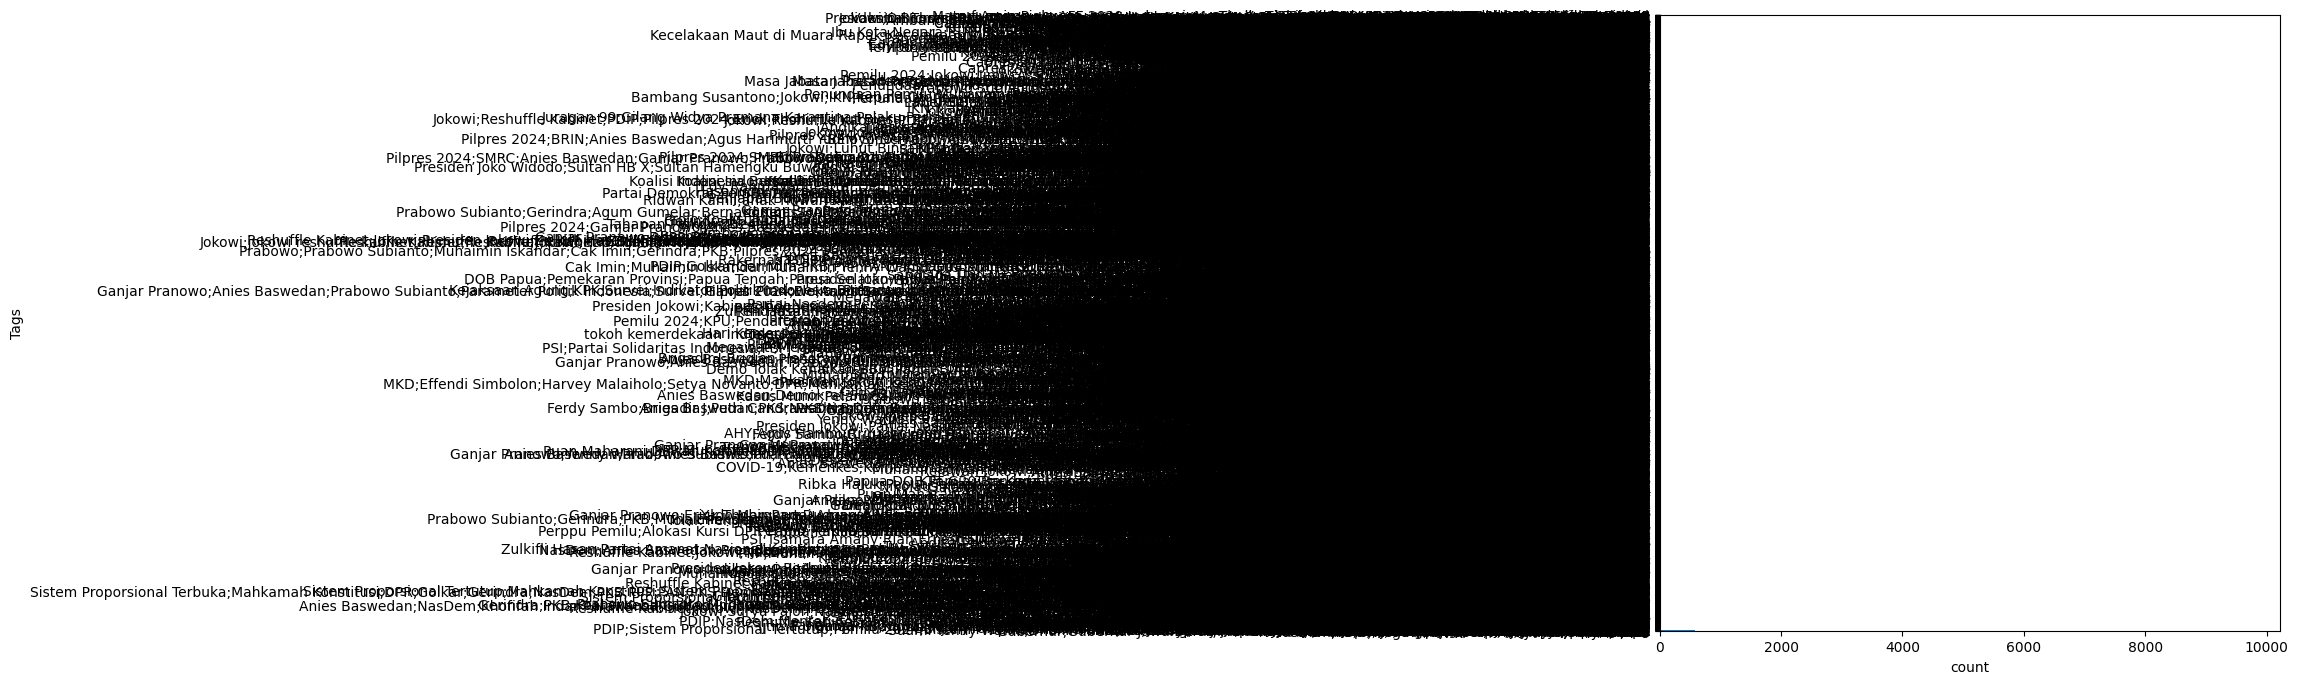

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y="Tags", data = df)

<Axes: xlabel='count', ylabel='is_fake'>

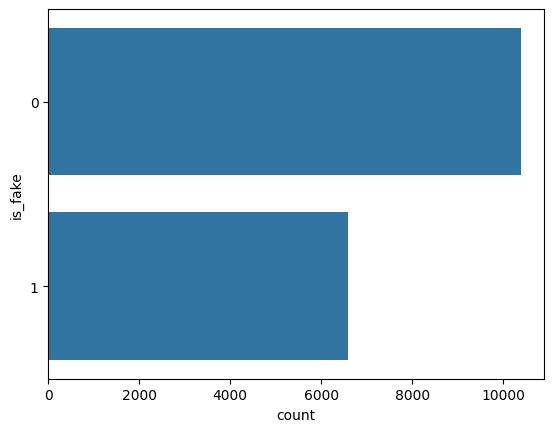

In [ ]:
sns.countplot(y="is_fake", data=df)

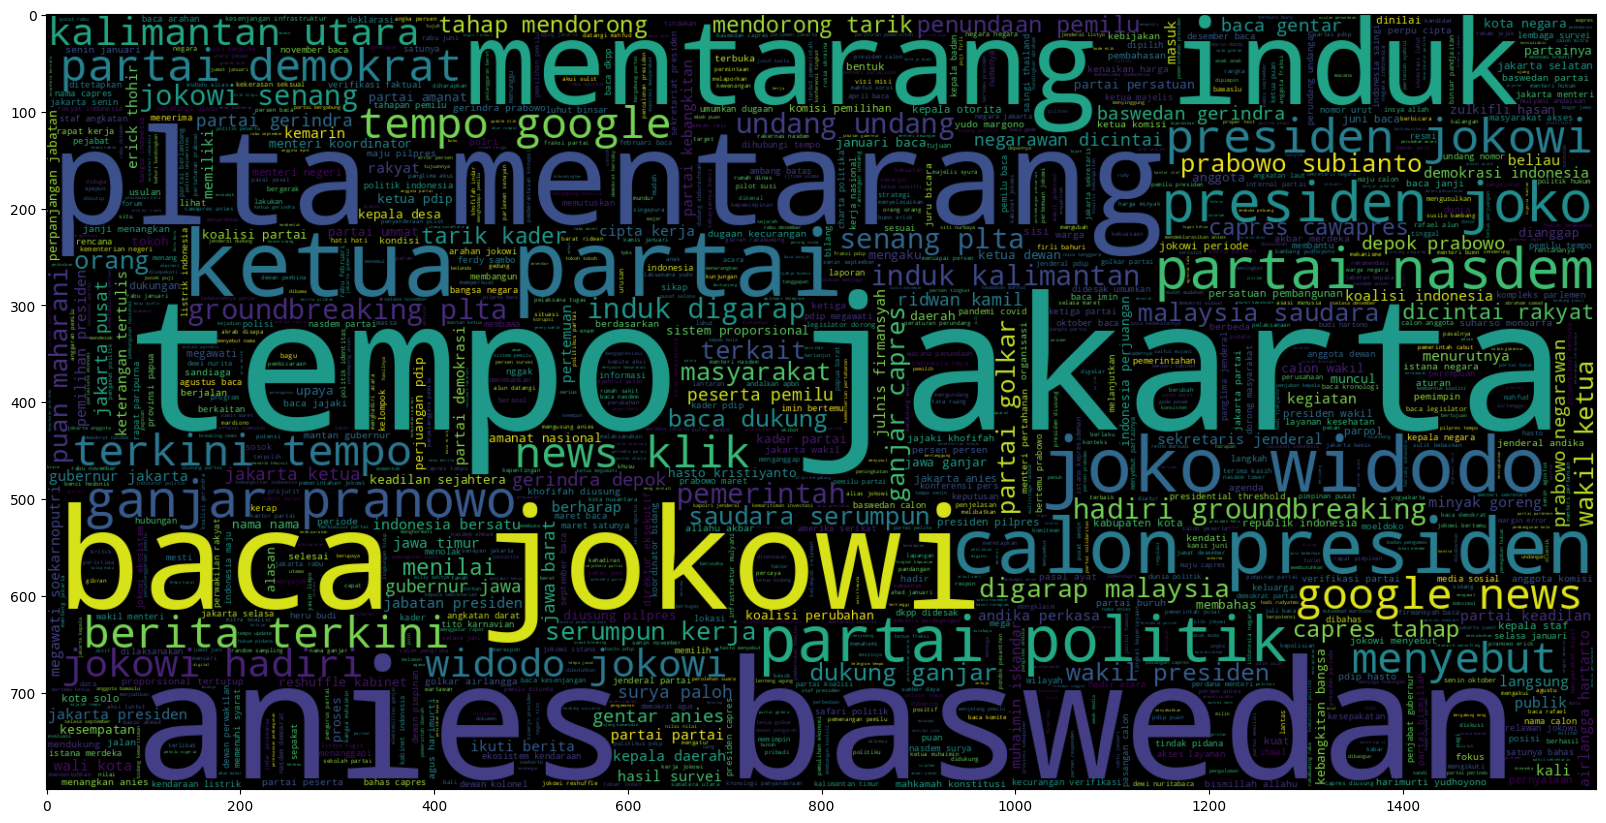

In [ ]:
# Plotting the word count for REAL

plt.figure(figsize=(20,20))
wc = WordCloud(max_words =2000, width = 1600, height =800, stopwords = stop_words).generate(" ".join(df[df['is_fake']==1].clean_joined))
plt.imshow(wc, interpolation='bilinear')

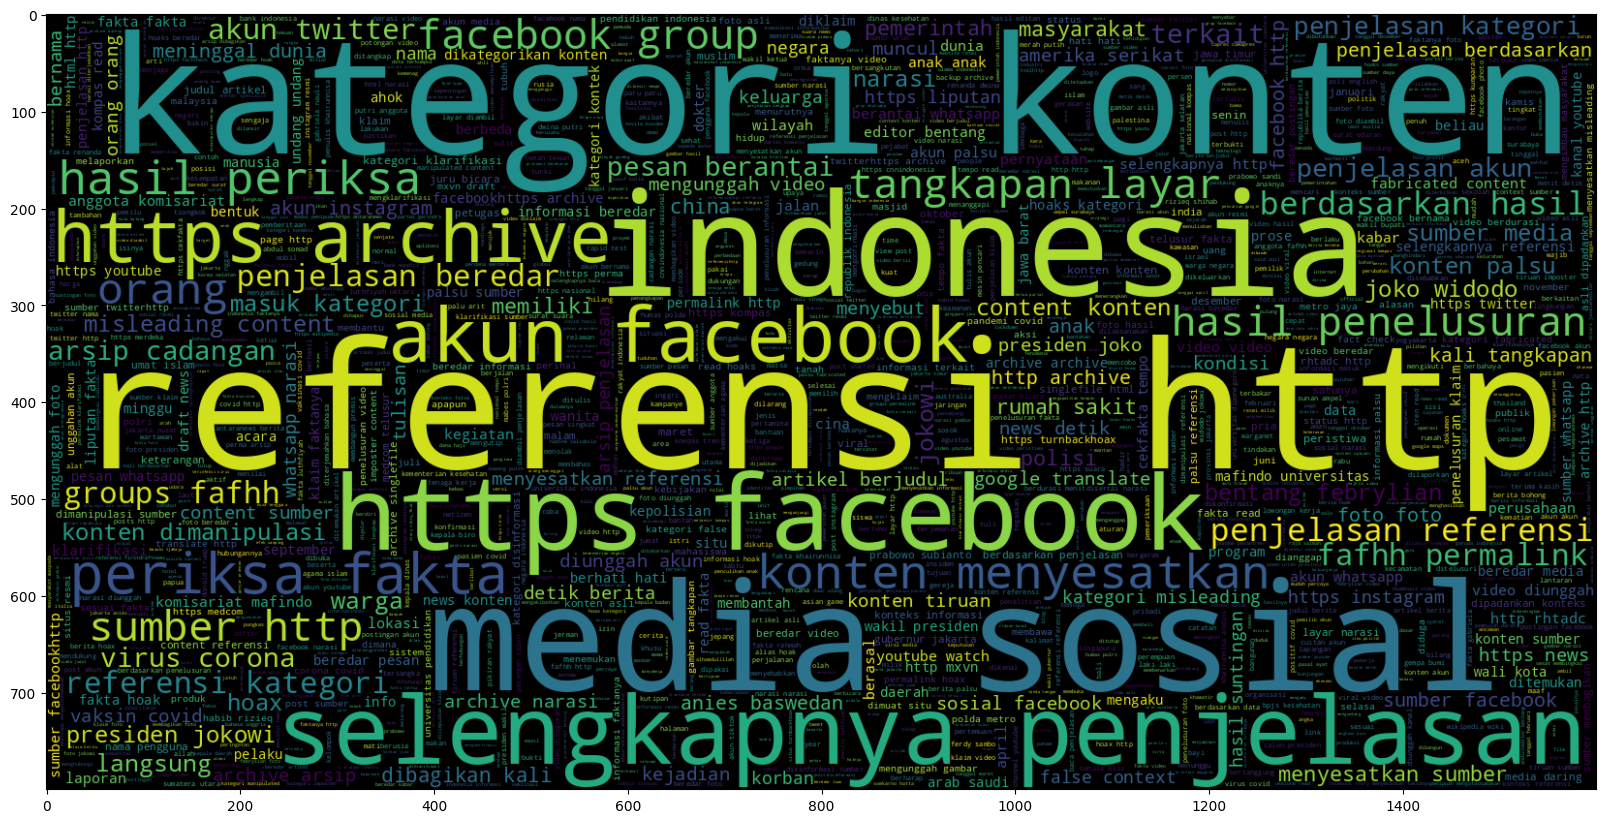

In [ ]:
# Plotting the word count for Fake

plt.figure(figsize=(20,20))
wc = WordCloud(max_words =2000, width = 1600, height =800, stopwords = stop_words).generate(" ".join(df[df['is_fake']==0].clean_joined))
plt.imshow(wc, interpolation='bilinear')

In [ ]:
import nltk
nltk.download('punkt')

maxlen = -1
for doc in df.clean_joined:
  tokens = nltk.word_tokenize(doc)
  if(maxlen<len(tokens)):
    maxlen = len(tokens)

print("Maximum number of words in any document is =", maxlen)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Maximum number of words in any document is = 2590


In [ ]:
import plotly.express as px
fig = px.histogram(x=[len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins=100)
fig.show()

# **TF-IDF**

In [ ]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined, df.is_fake, test_size =0.2)

In [ ]:
tokenizer = Tokenizer(num_words = total_words) #list of unique number of from a dataset above
tokenizer.fit_on_texts(X_train)
train_sequence = tokenizer.texts_to_sequences(X_train) #for train
test_sequence = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train

4019     moeldoko dudung effendi supremasi sipil hargai...
11123    foto badai petir angkasa hasil periksa fakta r...
11693    foto kebobrokan indonesia ditutupi hasil perik...
15634    disinformasi balada cinta segi ahok veronica a...
2908     papua berdampak signifikan anggaran pemilu tem...
                               ...                        
15472    jokowi megawati marah puan maharani dikaitkan ...
4545     polemik ganjar pranowo seiring calon presiden ...
13626    batu karya seni gabion terumbu karang dilindun...
6224     ridwan kamil golkar sodorkan airlangga capres ...
820      presiden jokowi buktikan komitmen pemilu tempo...
Name: clean_joined, Length: 13578, dtype: object

In [ ]:
print("Encoding of a document: \n", df.clean_joined[0], "\n is:", train_sequence[0])

Encoding of a document: 
 amin saksikan timnas indonesia thailand final tempo jakarta wakil presiden amin dijadwalkan menyaksikan laga final piala timnas indonesia melawan thailand sabtu desember menonton bareng laga timnas semifinal sabtu malam wapres menonton laga final timnas mudah mudahan timnas sepak bola memperoleh kemenangan pelaksana tugas kepala sekretariat wapres ahmad erani yustika keterangannya desember laga final putaran indonesia thailand kemarin dibenahi asuhan pelatih shin yong staminanya diperkuat bermain menit perubahan didorong kecepatan lari wartawan kamis desember dibenahi amin permainan asnawi mangkualam wapres nonton bareng laga semifinal timnas indonesia melawan singapura pekan pengawal pegawainya menilai permainan timnas indonesia bagus segi teknik permainan bagus serangan serangan menyerang bertahan permainan potensi memenangkan permainan ahad besok amin rencananya berolahraga rutin menutup keterangannya erani ucapan selamat selamat mudah mudahan senantiasa ke

In [ ]:
X_test

9402     pesan berantai berpulang sinta nuriyah istri k...
8819     akun facebook bupati kapuas hulu fransiskus di...
11583    foto tokoh indonesia penari tari perut hasil p...
9488     video peluncuran matahari buatan china hasil p...
1991     muhaimin iskandar diskusi presiden zelenskyy b...
                               ...                        
1813     sekda sosok dinilai gantikan anies baswedan te...
16219    najwa shihab menteri sosial sumber media cetak...
15886    hoax rakyat vietnam usir ribuan warga cina art...
14542    salam jari kapal oleng kapten arti pose jari p...
9739     video eric tohir terbuka chip vaksin covid has...
Name: clean_joined, Length: 3395, dtype: object

In [ ]:
print("Encoding of a document: \n", X_test.iloc[0], "\n is:", test_sequence[0])

Encoding of a document: 
 pesan berantai berpulang sinta nuriyah istri kamis agustus informasi palsu faktanya berdasarkan klarifikasi tanggal siang keluarga sinta nuriyah abdurrahman wahid sehat selengkapnya penjelasan referensi kategori konten palsu sumber pesan berantai whatsapp narasi innalillahi innailaihi rojiun berpulang rahmatullah sinta nuriyah istri kamis agustus semoga almarhumah menghadap sang khaliq husnul khotimah baiknya sisi allah aamiin fatihah penjelasan berdasarkan jenis disinformasi draft konten palsu konten didesain menipu merugikan klarifikasi siang keluarga faktanya sinta nuriyah abdurrahman wahid sehat sehinggai informasi dibagikan sumber informasi palsu sumber klarifikasi detiknews jakarta beredar pesan berantai mengabarkan istri presiden abdurrahman wahid sinta nuriyah wahid meninggal dunia kabar hoax hasil pencarian anti hoax search engine aplikasi hoax buster tools kunci sinta nuriyah meninggal hasil pencarian google news kunci sinta nuriyah meninggal referen

In [ ]:
padded_train = pad_sequences(train_sequence, maxlen =40, padding ='post', truncating ='post')
padded_test = pad_sequences(test_sequence, maxlen =40, truncating = 'post')

In [ ]:
for i, doc in enumerate(padded_train[:2]):
  print("Padded Encoding of a doc", i+1, "is:", '\n', doc)

Padded Encoding of a doc 1 is: 
 [ 1010  1266  1785 11738   650  9274  1769    21     7    44   508     5
  1010   471  2122    44   508   461  1121  2992   129  1266  3448    43
   170   354   417   230  1785  3778   232   237  1242  4235  1011  1266
 13247  2062  1785   449]
Padded Encoding of a doc 2 is: 
 [    8  2171  3426  2063    16    93    26  5325   527  4321    43   703
   474   134     3  2063     8   248  5180   885  5180  3239  6120   576
    22   366   613    20    12    68     1    38 58310    14 30615  7900
  5425  1325  2171  3426]


In [ ]:
x = df.clean_joined
y = df.is_fake
# X_train, X_test, y_train, y_test = train_test_split(df.clean_joined, df.is_fake, test_size =0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train

14822    indomaret klarifikasi tayangan jokowi protes k...
9605     video hukuman mati koruptor uang negara korea ...
675      sosok arifin panigoro kader pdip mendirikan te...
16210    edukasi indonesia pusaran arus informasi indon...
1328     tegaskan pemilu februari jokowi berharap speku...
                               ...                        
4598     nasdem bilang partai demokrat sepakat dukung a...
3244     bilang demokrat dulang suara daerah otonomi pa...
15720    disinformasi akibat kecanduan main game akibat...
6073     mengaku diintervensi ketua arahan mahfud pemil...
14719    disinformasi pidato anies baswedan pesta rakya...
Name: clean_joined, Length: 12729, dtype: object

In [ ]:
x_test

2369     profil raja juli antoni alumni iain wakil ment...
13304    klarifikasi prosesi pernikahan sejenis gereja ...
526      kementerian kali berkantor tempo jakarta lemba...
70       gibran masuk radar pilgub pdip tanggung solo t...
6486     pertimbangkan merapat catatan tempo jakarta wa...
                               ...                        
2368     haedar nashir menteri manfaatkan jabatan pemil...
4409     teruskan program jokowi jakarta anies tempo ja...
5871     politisi pindah partai politik tempo jakarta m...
15051    klarifikasi terkait dukungan politik partai be...
3594     daerah dukung sandiaga capres suharso monoarfa...
Name: clean_joined, Length: 4244, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
print(xv_train)

  (0, 38222)	0.05776470057170086
  (0, 98462)	0.02297213726704333
  (0, 12063)	0.02704207094212683
  (0, 36506)	0.015900333776841403
  (0, 35066)	0.02927954318558846
  (0, 19919)	0.01844528385798325
  (0, 65017)	0.012695599404791678
  (0, 36508)	0.009060559297261146
  (0, 86974)	0.02005375764609875
  (0, 106627)	0.05776470057170086
  (0, 99346)	0.01713213455300908
  (0, 80655)	0.009330661279381564
  (0, 98979)	0.023582924176244958
  (0, 22925)	0.06395135365020095
  (0, 20828)	0.0571539911825597
  (0, 57152)	0.05951070419581577
  (0, 55117)	0.026154476031717843
  (0, 55182)	0.06180554678580711
  (0, 90871)	0.03516620300201089
  (0, 58447)	0.023140312839494193
  (0, 57436)	0.021628097483983783
  (0, 71391)	0.014992162024825192
  (0, 22460)	0.030244386372059697
  (0, 38246)	0.01968751890706819
  (0, 9537)	0.03551289952066623
  :	:
  (12728, 73908)	0.0273135014356675
  (12728, 28565)	0.05517910306341722
  (12728, 33178)	0.026954243041635056
  (12728, 86810)	0.06682343213853106
  (12728, 74

In [ ]:
print(xv_test)

  (0, 103614)	0.032068617937171716
  (0, 102555)	0.12716280478201197
  (0, 100748)	0.06681148042946332
  (0, 100289)	0.06141769319940251
  (0, 100285)	0.03341766877630244
  (0, 97865)	0.08995732271715674
  (0, 97453)	0.07946880772257904
  (0, 96056)	0.05158421410786866
  (0, 94886)	0.021006164117300285
  (0, 94255)	0.05198983252288082
  (0, 93159)	0.15957419719004576
  (0, 92609)	0.04989149600872109
  (0, 92253)	0.059579622317053396
  (0, 92145)	0.08499175256602366
  (0, 92126)	0.017670337970407582
  (0, 91434)	0.09254955683294447
  (0, 91343)	0.03699850954231844
  (0, 91285)	0.07444876201972639
  (0, 91281)	0.12550564398665812
  (0, 89914)	0.060340698308872925
  (0, 86338)	0.07292304611546292
  (0, 86152)	0.07660412781387049
  (0, 85315)	0.07110679099561219
  (0, 85290)	0.07404813990177475
  (0, 84774)	0.07772299588331293
  :	:
  (4243, 13608)	0.04377512486661943
  (4243, 12869)	0.05610994750516543
  (4243, 11104)	0.029416917098311374
  (4243, 10786)	0.04780323025977943
  (4243, 10537

In [ ]:
xv_test.shape, xv_train.shape

((4244, 108270), (12729, 108270))

# **Train Model**

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9931668237511782

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2587
           1       0.99      0.99      0.99      1657

    accuracy                           0.99      4244
   macro avg       0.99      0.99      0.99      4244
weighted avg       0.99      0.99      0.99      4244



In [ ]:
# Decision Tree Classification

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9985862393967955

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       1.00      1.00      1.00      1657

    accuracy                           1.00      4244
   macro avg       1.00      1.00      1.00      4244
weighted avg       1.00      1.00      1.00      4244



In [ ]:
# Gradient Boosting Classifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9992931196983977

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       1.00      1.00      1.00      1657

    accuracy                           1.00      4244
   macro avg       1.00      1.00      1.00      4244
weighted avg       1.00      1.00      1.00      4244



In [ ]:
# Random Forest Classifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9988218661639963

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       1.00      1.00      1.00      1657

    accuracy                           1.00      4244
   macro avg       1.00      1.00      1.00      4244
weighted avg       1.00      1.00      1.00      4244



In [ ]:
# Model Testing

def output_lable(n):
    if n == 0:
        return "Hoax"
    elif n == 1:
        return "Tidak Hoax"

def manual_testing(news):
    testing_news = {"clean_joined":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_x_test = new_def_test["clean_joined"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

Partai Ummat menjadi peserta pemilu 2024


LR Prediction: Tidak Hoax 
DT Prediction: Hoax 
GBC Prediction: Hoax 
RFC Prediction: Hoax


In [ ]:
# find

titles = df['Title']
titles = [str(title) for title in titles]
# Define a regular expression for titles
title_pattern = re.compile(r'\b(?:Mr\.|Mrs\.|Dr\.|bekal strategic foresight capres pandangan foresight dimiliki capres cawapres bangsa situasi dunia rentan kompleks|Manager)\b', flags=re.IGNORECASE)

# Find titles in the list
found_titles = [title for title in titles if title_pattern.search(title)]

print(found_titles)

['[SALAH] Manager Giant Pal 6 Banjarmasin Meninggal Kena Covid-19', '[SALAH] Foto  Pdt.DR.Ir.Niko Njotorahardjo Mendukung Paslon Prabowo-Sandi']


**Data Uji**

**Mengukur Performa**

**Akurasi**

**Data Latih**

**Klasifikasi**

**Persentasi Hoax**